---
title: Exploration des domaines NC
author: Olivier Ruineau
description: POC sur les données domaine NC ou comment explorer des données facilement !
show-code: False
show-prompt: True
output: app
params:
    detail:
        input: numeric
        label: niveau de détail dans les graphs
        value: 10
        min: 5
        max: 20
        step: 5
---

In [8]:
detail = 10

# domaine-nc-jupyter-notebook #

Jupyter Notebook dédié à la l'analyse des noms de domaines en Nouvelle-Calédonie

Ce Notebook est à la fois une analyse et un example de ce qui est faisable avec:
- une source de donnée propre
- quelques bases de programmation
- une stack qui va bien

Il permet surtout de montrer à quel point le partage avec des non techniciens peut être simple !!

Le code source est accessible sur [github](https://github.com/opt-nc/domaine-nc-jupyter-notebook)

In [2]:
import pandas as pd

input_csv = 'domaine-nc.csv'
domaine = pd.read_csv(input_csv)

# les dates sont en texte par defaut, on convertit en datetime
domaine['dateCreation'] = pd.to_datetime(domaine['dateCreation'])
domaine['dateModification'] = pd.to_datetime(domaine['dateModification'])
domaine['dateExpiration'] = pd.to_datetime(domaine['dateExpiration'])

## Notre fichier ##

Les 3 premieres lignes du fichier pour bien se rendre compte de nos données en entrée

In [19]:
domaine.head(3)

,nom,extension,gestionnaire,beneficiaire,status,dns1,dns2,dns3,dateCreation,dateModification,dateExpiration,nbDaysBeforeExpires,expired,note
0,032,nc,LA FABRIK,Ridet : 1507490-001 32C,green,ns-408.awsdns-51.com,ns-1687.awsdns-18.co.uk,ns-1488.awsdns-58.org,2021-08-23,2021-08-23,2026-08-23,1492,False,Les données de cet annuaire WHOIS ne sont four...
1,1012,nc,AUCUN,Ridet : 0132720-001 OPT,green,nsopt1.opt.nc,nsopt2.opt.nc,nsopt3.opt.nc,2008-04-02,2021-04-06,2028-04-02,2080,False,Les données de cet annuaire WHOIS ne sont four...
2,1013,nc,OPT,Ridet : 0132720-004 AGENCE COMMERCIALE DE L'OP...,green,nsopt1.opt.nc,nsopt2.opt.nc,nsopt3.opt.nc,2008-04-08,2021-02-16,2023-04-08,259,False,Les données de cet annuaire WHOIS ne sont four...


## Quelques stat pour commencer ##


In [18]:
print(f"Nombre de domaines : {len(domaine)}")
print(f'Etat : \n{domaine.status.value_counts().to_string()}')

Nombre de domaines : 6651
Etat : 
green     6617
orange      22
red         12


## Gaphiques génériques ##

Quelques graphiques génériques, bien sur on peut en ajouter autant qu'on veut !

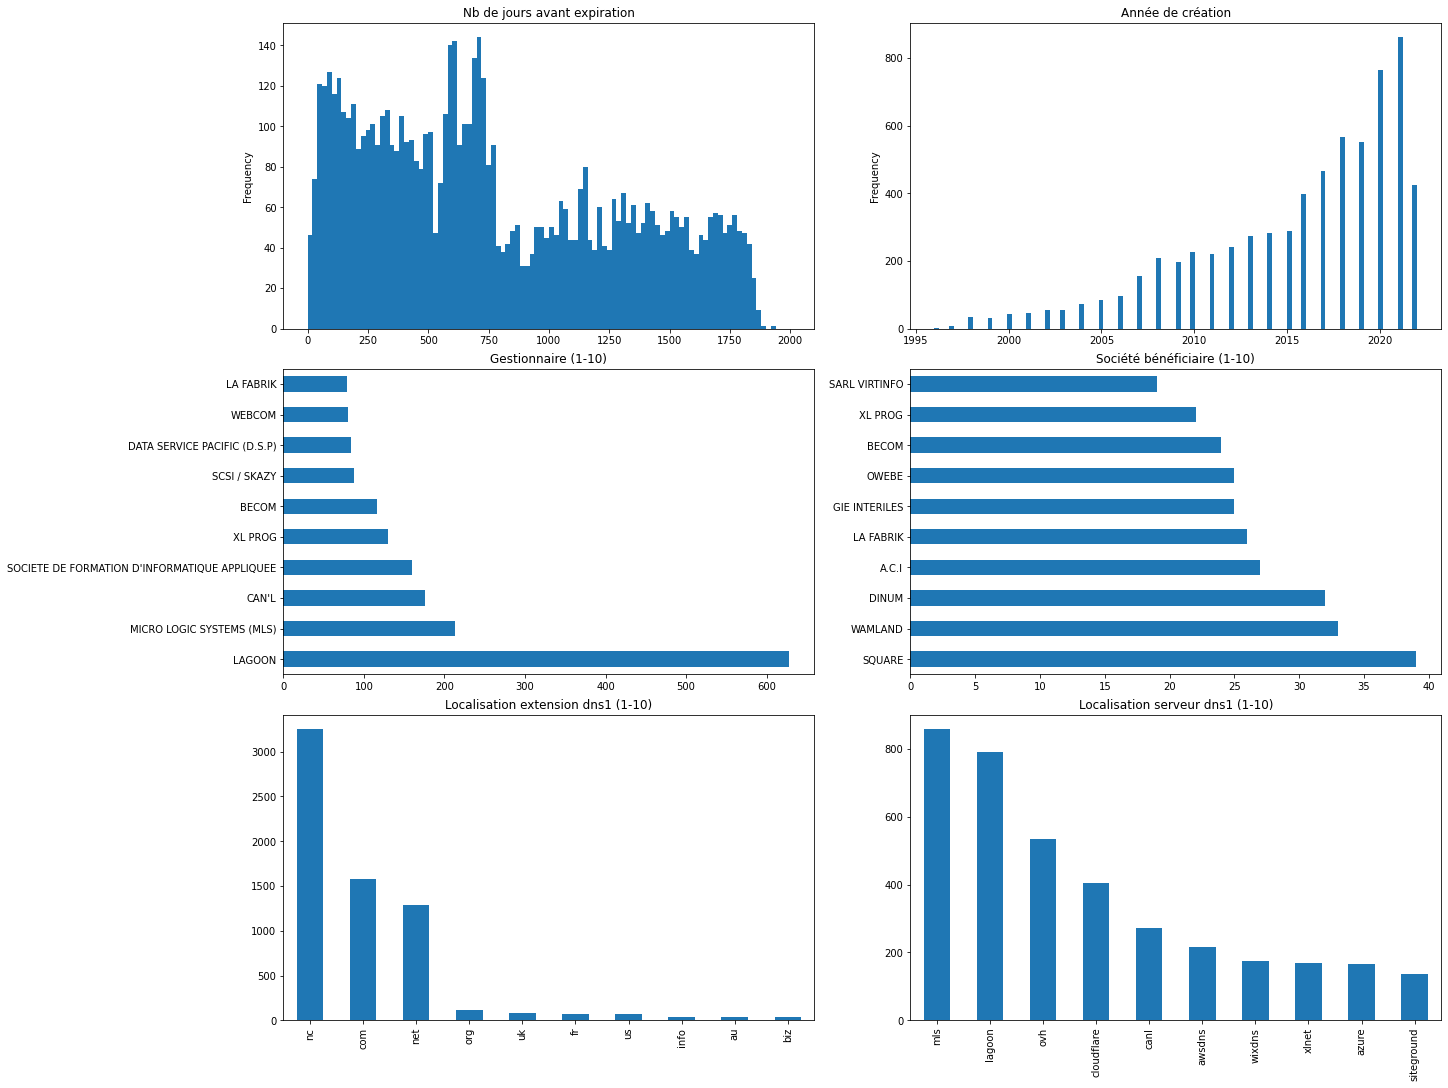

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15), constrained_layout=True)

# jours avant expiration en histogramme
domaine.nbDaysBeforeExpires.plot(kind='hist', bins=detail*10, range=(0,2000), title='Nb de jours avant expiration', ax=ax[0,0])

# année de création en histogramme
domaine.dateCreation.dt.year.plot(kind='hist', bins=detail*10, title='Année de création', ax=ax[0,1])

# gestionnaires de domaines par nombre de domaines gérés
gestionnaire = domaine[domaine.gestionnaire != 'AUCUN'].gestionnaire.value_counts()
gestionnaire.head(detail).plot(kind='barh', title=f'Gestionnaire (1-{detail})', ax=ax[1,0])

# societés bénéficiaires des domaines par nombre de domaines
benef = domaine.beneficiaire.str.extract(r'Ridet : [0-9]{7}-[0-9]{3} (.*)', expand=False).value_counts()
benef.head(detail).plot(kind='barh', title=f'Société bénéficiaire (1-{detail})', ax=ax[1,1])

# extension dns de domaines par nombre de domaines
dns = domaine.dns1.str.split('.').str[-1].value_counts()
dns.head(detail).plot(kind='bar', title=f'Localisation extension dns1 (1-{detail})', ax=ax[2,0])

# serveur dns de domaines par nombre de domaines
dns = domaine.dns1.str.split('.').str[-2].str.extract(r'([a-zA-Z]*[0-9]*)', expand=False).value_counts()
dns.head(detail).plot(kind='bar', title=f'Localisation serveur dns1 (1-{detail})', ax=ax[2,1])

plt.show()

## Domaines avec expiration dans la semaine ##

Liste des domaines expirant dans la semaine avec l'affichage de la date d'expiration ainsi que le gestionnaire du domaine

In [14]:
domaine[(domaine.nbDaysBeforeExpires<7)&(domaine.nbDaysBeforeExpires>0)][['nom', 'gestionnaire', 'dateExpiration']].sort_values('dateExpiration')

,nom,gestionnaire,dateExpiration
3114,isante,SQUARE,2022-07-24
4122,mieux-batir,AUCUN,2022-07-24
5415,sadt,AUCUN,2022-07-24
3761,loky,AUCUN,2022-07-25
4216,moneymarket,AUCUN,2022-07-25
6,118,MEGALEET TECHNOLOGY NC S.A.S.,2022-07-28
3556,lecolefilante,AUCUN,2022-07-28
1228,cci,AUCUN,2022-07-29


## Domaines expirés ##

Liste des domaines déja expirés

In [15]:
domaine[domaine.nbDaysBeforeExpires<0][['nom', 'gestionnaire', 'dateExpiration']].sort_values('dateExpiration')

,nom,gestionnaire,dateExpiration
4539,noumeateam,NAUTILE,2018-03-19
3360,labande,AUCUN,2019-08-25
1078,caledoniaspirit,AUCUN,2019-12-11
5958,stratconsultant,AUCUN,2020-10-29
4038,medisud,AUCUN,2021-05-19
4579,ntenvironnement,AUCUN,2021-05-28
4452,nexttrade,AUCUN,2021-05-30
2698,green,AUCUN,2021-06-03
2692,grandes-fougeres,AUCUN,2021-08-03
2324,exercisekitchen,AUCUN,2022-06-21
